In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from model import GAN

np.random.seed(0)

/home/taiger/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.reset_default_graph()
model = GAN()
saver = tf.train.Saver()
sess = tf.Session()
saver.restore(sess, 'model/gan/model')

INFO:tensorflow:Restoring parameters from model/gan/model


## Generation
Feed random noise vectors into the model to generate new samples.

In [3]:
z = np.random.uniform(0, 1, size=[64, 100])
out = sess.run(model.inference, feed_dict={
    model.z: z,
    model.keep_prob: 1.0,
})
out.shape

(64, 28, 28, 1)

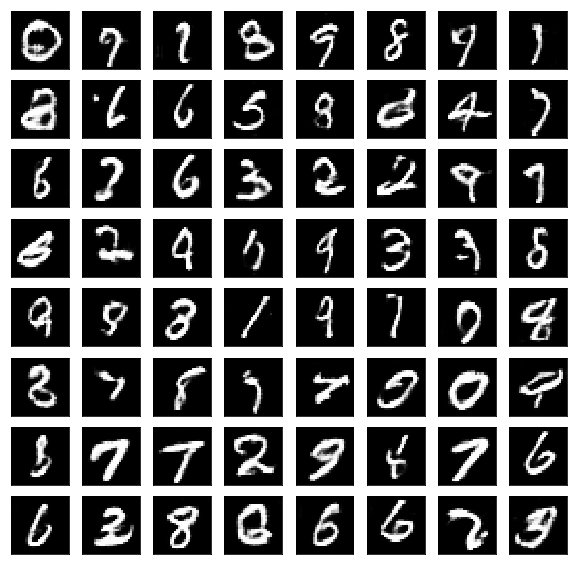

In [4]:
plt.figure(figsize=(10, 10))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.xticks([]), plt.yticks([])
    plt.imshow(out[i].reshape(28, 28), cmap='gray')

## Interpolation
Take two random noise vectors, `z1` and `z2`. By feeding vectors along the path of `z2 - z1` we are able to obtain an interpolation of images between the results of `z1` and `z2` respectively.

In [5]:
n_steps = 10
z1, z2 = np.random.uniform(-1, 1, [2, 100])
step = z2 - z1
out = sess.run(model.inference, feed_dict={
    model.z: [z1 + (step * i) for i in range(n_steps)],
    model.keep_prob: 1.0,
})
out.shape

(10, 28, 28, 1)

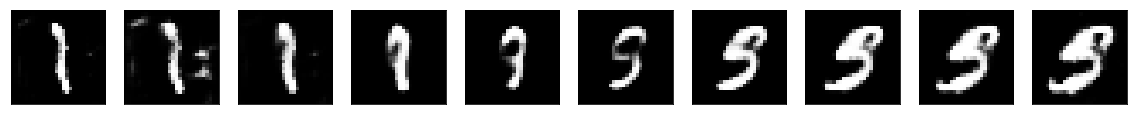

In [6]:
plt.figure(figsize=(20, 5))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([]), plt.yticks([])
    plt.imshow(np.squeeze(out[i], axis=-1), cmap='gray')